# Teleportation

In [1]:
from openql import openql as ql
from utils import simulate, plot_histogram, random_state

In [2]:
ql.initialize()
compiler = ql.Compiler("compiler", "./config/compiler-config.json")

platform = ql.Platform("platform", "none")
platform.set_compiler(compiler=compiler)


In [3]:
tp_program = ql.Program("teleportation", platform=platform, qubit_count=3)
tp_kernel = ql.Kernel("tp-kernel", platform=platform, qubit_count=3)

# prepare state that will be sent, ie |+>
tp_kernel.hadamard(0)

# create bell state for Alice and Bob
tp_kernel.hadamard(1)
tp_kernel.cnot(1, 2)

# expansion in Bell's basis by Alice
tp_kernel.cnot(0, 1)
tp_kernel.hadamard(0)

# Bob's state translation
tp_kernel.cnot(1, 2)
tp_kernel.cz(0, 2)

# make measurements
tp_kernel.measure(0)
tp_kernel.measure(1)
tp_kernel.measure(2)

tp_program.add_kernel(tp_kernel)
tp_program.compile()


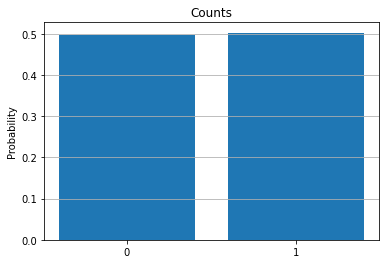

In [12]:
counts = simulate(program=tp_program, measured=[2], shots=1024)

plot_histogram(counts)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dedd1051-cb34-4841-b8e5-79089caae121' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>